In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import datetime

In [2]:
df = pd.read_csv("../data/thursday.csv")

In [3]:
df.sample()

,tmstmp,typ,stpnm,stpid,vid,dstp,rt,rtdd,rtdir,des,...,tablockid,tatripid,origtatripno,dly,dyn,prdctdn,zone,psgld,stst,stsd
113060,20211025 12:24,A,Fuller Rd at Mitchell Field Lot M-75,M350,3036.0,10297,NX,NX,NORTHBOUND,North Campus,...,257NWE,339120,339120,False,0,12,NaN,NaN,44760,2021-10-25


In [110]:
df.stpnm.unique()

array(['Baits II Inbound', 'Bursley Hall Inbound',
       'Hayward/Hubbard  Hubbard Outbound', 'Glen/Catherine Outbound',
       'Fuller Rd at Mitchell Field  Lot M-75',
       'Central Campus Transit Center: Ruthven Museum',
       'Pierpont Commons  Murfin Outbound', 'FXB Inbound',
       'Cooley Lab Inbound', 'Northwood I Outbound',
       'NCAC, Hubbard Outbound',
       'Fuller Rd at Lot NC-78  Mitchell Field (1)', 'Northwood V (3)',
       'Power Center', 'Glen/Catherine Inbound',
       'Pierpont Commons  Bonisteel Inbound', 'Cardiovascular Center',
       'NCAC  Hubbard Inbound', 'Hayward/Hubbard  Hubbard Inbound',
       'Plymouth Rd Crosswalk', 'Northwood Community Center',
       'Northwood III Outbound', 'Northwood II Outbound',
       'Stockwell Hall Outbound', 'Rackham Bldg',
       'Central Campus Transit Center: Chemistry', 'Couzens Hall',
       'Cancer Center Inbound', 'Mott Hospital', 'Markley Hall',
       'Taubman Outbound', 'Cancer Center Outbound', 'Taubman Inbou

In [98]:
df.rt.unique()

array(['BB', 'NW', 'WX', 'MX', 'CN', 'CS', 'WS', 'NE', 'NX', 'DD', 'CSX'],
      dtype=object)

# Let's look at what routes are there

In [18]:
df.tmstmp = pd.to_datetime(df.tmstmp)

In [112]:
stoptimes = df[df.rt.eq("BB") & df.rtdir.eq("NORTHBOUND") & df.stpnm.eq("Central Campus Transit Center: Chemistry")].groupby([df.tmstmp.dt.date, "tatripid"]).agg("last")




# Questions

1. Which bus route is most frequent when going to North from CCTC?
2. Or going south from North campus?
3. What about each stop (all of the other stops?)
4. Which bus routes are slower than they should be? Faster???
5. How frequently are there big gaps vs very small gaps?
6. How long for a bus? any bus? please!!!
7. What bus stops do you have to wait the longest?


In [113]:
stoptimes

tmstmp typ  \
tmstmp     tatripid                           
2021-10-24 325675   2021-10-24 23:58:00   D   
           325676   2021-10-24 23:58:00   D   
           325677   2021-10-24 23:39:00   D   
           325678   2021-10-24 23:30:00   D   
           325679   2021-10-24 23:14:00   D   
...                                 ...  ..   
2021-10-28 326065   2021-10-28 08:32:00   D   
           326066   2021-10-28 08:11:00   D   
           326067   2021-10-28 07:54:00   D   
           326068   2021-10-28 07:29:00   D   
           326069   2021-10-28 07:12:00   D   

                                                        stpnm stpid     vid  \
tmstmp     tatripid                                                           
2021-10-24 325675    Central Campus Transit Center: Chemistry  C250  3019.0   
           325676    Central Campus Transit Center: Chemistry  C250  3018.0   
           325677    Central Campus Transit Center: Chemistry  C250  3019.0   
           325678    Central Campus Transit Center: Chemistry  C250  3018.0   
           325679    Central Campus Transit Center: Chemistry  C250  3019.0   
...                                                       ...   ...     ...   
2021-10-28 326065    Central Campus Transit Center: Chemistry  C250  3062.0   
           326066    Central Campus Transit Center: Chemistry  C250  3064.0   
           326067    Central Campus Transit Center: Chemistry  C250     NaN   
           326068    Central Campus Transit Center: Chemistry  C250  3062.0   
           326069    Central Campus Transit Center: Chemistry  C250  3064.0   

                      dstp  rt rtdd       rtdir      des           prdtm  \
tmstmp     tatripid                                                        
2021-10-24 325675    13982  BB   BB  NORTHBOUND  Baits I  20211025 00:15   
           325676       86  BB   BB  NORTHBOUND  Baits I  20211025 00:00   
           325677       30  BB   BB  NORTHBOUND  Baits I  20211024 23:45   
           325678       89  BB   BB  NORTHBOUND  Baits I  20211024 23:30   
           325679      -50  BB   BB  NORTHBOUND  Baits I  20211024 23:15   
...                    ...  ..  ...         ...      ...             ...   
2021-10-28 326065      -11  BB   BB  NORTHBOUND  Baits I  20211028 08:35   
           326066     1461  BB   BB  NORTHBOUND  Baits I  20211028 08:15   
           326067        0  BB   BB  NORTHBOUND  Baits I  20211028 07:55   
           326068       30  BB   BB  NORTHBOUND  Baits I  20211028 07:35   
           326069      734  BB   BB  NORTHBOUND  Baits I  20211028 07:15   

                    tablockid  origtatripno    dly  dyn prdctdn  zone  psgld  \
tmstmp     tatripid                                                            
2021-10-24 325675       411BB        325675  False    0      15   NaN    NaN   
           325676       412BB        325676  False    0     DUE   NaN    NaN   
           325677       411BB        325677  False    0       4   NaN    NaN   
           325678       412BB        325678  False    0     DUE   NaN    NaN   
           325679       411BB        325679  False    0     DUE   NaN    NaN   
...                       ...           ...    ...  ...     ...   ...    ...   
2021-10-28 326065       202BB        326065  False    0     DUE   NaN    NaN   
           326066       203BB        326066  False    0     DUE   NaN    NaN   
           326067       201BB        326067  False    0     DUE   NaN    NaN   
           326068       202BB        326068  False    0       5   NaN    NaN   
           326069       203BB        326069  False    0     DUE   NaN    NaN   

                      stst        stsd  
tmstmp     tatripid                     
2021-10-24 325675    87300  2021-10-24  
           325676    86400  2021-10-24  
           325677    85500  2021-10-24  
           325678    84600  2021-10-24  
           325679    83700  2021-10-24  
...                    ...         ...  
2021-10-28 326065    30900  2021-10

In [114]:
stoptimes.index.names = ["date", "tatripid"]
# stoptimes.tmstmp.reset_index(level=1)

In [119]:
stoptimes.tmstmp.reset_index(level=1).groupby("date").agg(lambda x: x.sort_values().diff().median())

,tatripid,tmstmp
date,,
2021-10-24,1.0,0 days 00:15:00
2021-10-25,1.0,0 days 00:05:00
2021-10-26,1.0,0 days 00:05:00
2021-10-27,1.0,0 days 00:05:00
2021-10-28,1.0,0 days 00:05:00


In [116]:
nx_at_cctc = stoptimes.tmstmp.reset_index(level=1)

In [117]:
nx_at_cctc_tds = nx_at_cctc[nx_at_cctc.tmstmp.dt.date.eq(datetime.date(2021, 10, 25))].tmstmp.sort_values().diff()[1:]

/Users/naitian/Documents/Projects/Daily/bus-scraper/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tmstmp', ylabel='Density'>

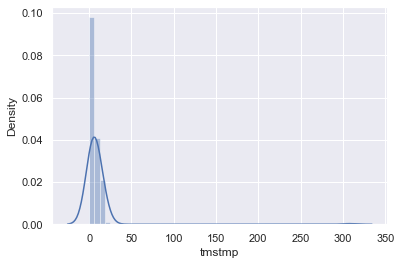

In [118]:
sns.distplot(nx_at_cctc_tds.dt.seconds / 60)

In [49]:
stoptimes.tmstmp.reset_index(level=1).groupby("date").

In [31]:
stoptimes.reset_index(drop=True).sort_values("tmstmp", ascending=True).tmstmp.diff().iloc[1:].mean()

Timedelta('0 days 00:33:13.285714285')

In [64]:
pd.to_datetime(df.tmstmp).dt.date.unique()

array([datetime.date(2021, 9, 7), datetime.date(2021, 9, 8),
       datetime.date(2021, 9, 9), datetime.date(2021, 9, 10),
       datetime.date(2021, 9, 11), datetime.date(2021, 9, 12),
       datetime.date(2021, 9, 13), datetime.date(2021, 9, 14),
       datetime.date(2021, 9, 15)], dtype=object)

In [30]:
stoptimes[["tmstmp", "prdtm"]]

,tmstmp,prdtm
tatripid,,
209151,20210912 01:59,20210912 02:00
209153,20210912 01:52,20210912 01:53
209155,20210912 01:46,20210912 01:47
209157,20210912 01:39,20210912 01:40
209159,20210912 01:32,20210912 01:33
...,...,...
285862,20210915 14:24,20210915 14:24
285863,20210915 14:44,20210915 14:44
285864,20210915 15:01,20210915 15:04


In [33]:
stoptimes.predicted = pd.to_datetime(stoptimes.prdtm)
stoptimes.timestamp = pd.to_datetime(stoptimes.tmstmp)

/var/folders/js/blxxt7796593_lb4036f3x680000gn/T/ipykernel_96703/1514798878.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  stoptimes.predicted = pd.to_datetime(stoptimes.prdtm)
/var/folders/js/blxxt7796593_lb4036f3x680000gn/T/ipykernel_96703/1514798878.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  stoptimes.timestamp = pd.to_datetime(stoptimes.tmstmp)


In [66]:
stoptimes.reset_index().to_csv("cc-cctc-stoptimes.csv", index=False)

In [53]:
stoptimes.timestamp.dt.date

tatripid
209151    2021-09-12
209153    2021-09-12
209155    2021-09-12
209157    2021-09-12
209159    2021-09-12
             ...    
285862    2021-09-15
285863    2021-09-15
285864    2021-09-15
285865    2021-09-15
285866    2021-09-15
Name: tmstmp, Length: 527, dtype: object

In [52]:
stoptimes.groupby(stoptimes.timestamp.dt.date).first()

,tmstmp,typ,stpnm,stpid,vid,dstp,rt,rtdd,rtdir,des,prdtm,tablockid,origtatripno,dly,dyn,prdctdn,zone,psgld,stst,stsd
tmstmp,,,,,,,,,,,,,,,,,,,,
2021-09-10,20210910 11:14,D,Central Campus Transit Center: Ruthven Museum,C251,3045.0,0,CC,CC,NORTHBOUND,Pierpont Commons,20210910 11:15,1304NWL,212947,False,0,DUE,NaN,NaN,40500,2021-09-10
2021-09-11,20210911 23:59,D,Central Campus Transit Center: Ruthven Museum,C251,NaN,0,CC,CC,NORTHBOUND,Pierpont Commons,20210912 00:00,4409CC,209195,False,0,DUE,NaN,NaN,86400,2021-09-11
2021-09-12,20210912 01:59,D,Central Campus Transit Center: Ruthven Museum,C251,NaN,0,CC,CC,NORTHBOUND,Pierpont Commons,20210912 02:00,4408CC,209151,False,0,DUE,NaN,NaN,93600,2021-09-11
2021-09-13,20210913 01:59,D,Central Campus Transit Center: Ruthven Museum,C251,3054.0,0,CC,CC,NORTHBOUND,Pierpont Commons,20210913 02:00,4408CC,210389,False,0,DUE,NaN,NaN,93600,2021-09-12
2021-09-14,20210914 14:53,D,Central Campus Transit Center: Ruthven Museum,C251,3059.0,411,CC,CC,NORTHBOUND,Pierpont Commons,20210914 14:58,1409CC,212991,False,0,4,NaN,NaN,53880,2021-09-14
2021-09-15,20210915 06:35,D,Central Campus Transit Center: Ruthven Museum,C251,3037.0,121,CC,CC,NORTHBOUND,Pierpont Commons,20210915 06:40,1402CC,212892,False,0,3,NaN,NaN,24000,2021-09-15


In [49]:
stoptimes.groupby(stoptimes.timestamp.dt.date).groups

{2021-09-10: [212947, 212951, 212955, 212959, 212962, 212963, 212969, 212987, 212994, 212996, 212998, 213000, 213002, 213006, 213011, 213013, 213015, 213017, 213024, 213025, 213028, 213029, 213032, 213033, 213037, 213041, 213045, 213049, 213051, 213053, 213055, 213059, 213060, 213064, 213066, 213068, 213070, 213074, 213076, 213078, 213080, 213084, 213085, 213089, 213091, 213093, 213095, 213097, 213099], 2021-09-11: [209195, 209198, 209202, 209206, 209209, 209213, 209217, 209220, 209224, 209228, 209231, 209235, 209239, 209242, 209246, 209250, 209253, 209257, 209261, 209264, 209268, 209272, 209275, 209279, 209283, 209286, 209290, 209294, 209297, 209301, 209305, 209308, 209312, 209316, 209319, 209323, 209327, 209331, 209335, 209339, 209343, 209347, 209351, 209354, 209358, 209361, 209365, 209368, 209372, 209375, 209379, 209382, 209386, 209389, 209393, 209396, 209400, 209403, 209407, 209411, 209414, 209418, 209421, 209425, 209429, 209432, 209436, 209439, 209443, 209446, 209450, 209453, 2094

In [19]:
df[df.rt.eq("NWL")].stpnm.unique()

array(['Pierpont Commons  Murfin Outbound',
       'Hayward/Hubbard  Hubbard Outbound', 'Plymouth Rd Crosswalk',
       'Northwood Community Center', 'Northwood III Outbound',
       'Northwood II Outbound'], dtype=object)